# TileDB OME-Zarr Conversion

In [1]:
import os
import cv2
import matplotlib.pylab as pylab
import tiledb

from tiledb.bioimg.converters.ome_zarr import OMEZarrConverter
from tiledb.bioimg.openslide import TileDBOpenSlide

## Convert OME-Zarr to TileDB Slide

In [2]:
src = "../tests/data/CMU-1-Small-Region.ome.zarr/0"
dest = src + ".tiledb"
if not os.path.exists(dest):
    OMEZarrConverter().to_tiledb(src, dest, level_min=0)

## Slide Group Contents

In [3]:
a = tiledb.open(os.path.join(dest,"l_0.tdb"))
a.schema

ArraySchema(
  domain=Domain(*[
    Dim(name='C', domain=(0, 2), tile=3, dtype='uint32'),
    Dim(name='Y', domain=(0, 2966), tile=1024, dtype='uint32'),
    Dim(name='X', domain=(0, 2219), tile=1024, dtype='uint32'),
  ]),
  attrs=[
    Attr(name='', dtype='uint8', var=False, nullable=False, filters=FilterList([ZstdFilter(level=0), ])),
  ],
  cell_order='row-major',
  tile_order='row-major',
  capacity=10000,
  sparse=False,
)

## TileDB Slide Information

In [4]:
slide = TileDBOpenSlide.from_group_uri(dest)
print("level_count:", slide.level_count)
print("dimensions:", slide.dimensions)
print("level_dimensions:", slide.level_dimensions)
print("level_downsamples:", slide.level_downsamples)


level_count: 1
dimensions: (2220, 2967)
level_dimensions: ((2220, 2967),)
level_downsamples: (1.0,)


## Reading Slide Data

In [5]:
img3d = slide.read_region((0,0), 0, slide.dimensions)
norm_img3d = cv2.normalize(src=img3d, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

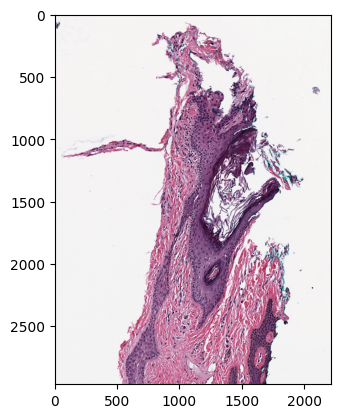

In [6]:
pylab.imshow(norm_img3d)